In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

(array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665],
       [0.19806286, 0.76053071]]), '\n\n', array([[0.16911084, 0.08833981],
       [0.68535982, 0.95339335],
       [0.00394827, 0.51219226],
       [0.81262096, 0.61252607],
       [0.72175532, 0.29187607]]))


Solution
===

In [9]:
def compute_distance(x,y):
    distance = np.subtract(x,y)
    distance = np.square(distance)
    distance = np.sum(distance)
    return np.sqrt(distance)

In [17]:
def naive(p, q):
    ''' fill your code in here...
    '''
    D = np.zeros((p.shape[0],q.shape[0]))
    for i in range(0,p.shape[0]):
        for j in range(0,q.shape[0]):
            D[i,j] = compute_distance(p[i,:],q[j,:])
    return D

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [37]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    temp_p = p[rows.ravel()]
    temp_q = q[cols.ravel()]
    
    distance = np.subtract(temp_p,temp_q)
    distance = np.square(distance)
    distance = np.sum(distance,axis=1)
    distance = np.sqrt(distance)
    D = distance.reshape((p.shape[0],q.shape[0]))
    return D

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [40]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [41]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [42]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

10 loops, best of 3: 54.2 ms per loop
100 loops, best of 3: 9.79 ms per loop
1000 loops, best of 3: 400 µs per loop
1000 loops, best of 3: 1.53 ms per loop


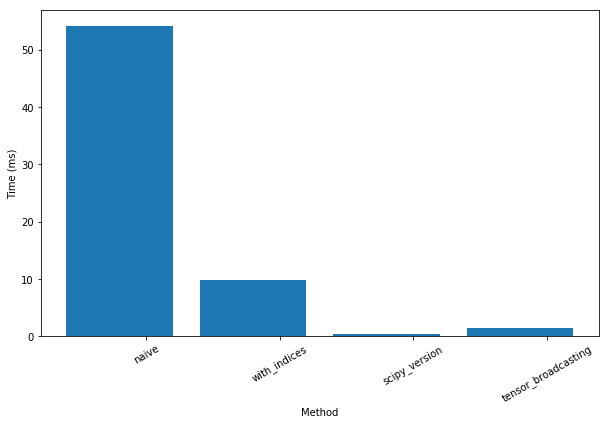

In [43]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()